<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,28.828791,85.073801,86.770474,43.994255,-1.281194,253.386128,254.499365,-1.113238
1,0.0,1.0,45.447381,58.181881,47.293837,73.757464,0.547509,235.228072,234.665499,0.562572
2,0.0,2.0,89.139827,27.364930,53.906692,63.974438,2.196118,246.582005,244.536435,2.045569
3,0.0,3.0,86.676525,57.564418,71.570029,51.143423,0.976949,277.931343,277.005288,0.926056
4,0.0,4.0,57.187009,30.262371,98.213124,58.828597,-0.654874,253.836226,254.466256,-0.630029
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.149467,41.407859,20.708114,42.071698,-0.685789,149.651349,150.497465,-0.846115
249996,999.0,246.0,42.049910,52.004889,53.107387,73.720719,0.127896,231.010801,230.972250,0.038551
249997,999.0,247.0,41.808670,60.509642,34.394472,60.211459,1.360854,208.285097,207.006959,1.278138
249998,999.0,248.0,87.722333,27.911377,69.719039,83.346122,-0.290961,278.407910,278.982252,-0.574342


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,28.828791,85.073801,86.770474,43.994255,-1.281194,253.386128,254.499365,-1.113238
1,0.0,1.0,45.447381,58.181881,47.293837,73.757464,0.547509,235.228072,234.665499,0.562572
2,0.0,2.0,89.139827,27.364930,53.906692,63.974438,2.196118,246.582005,244.536435,2.045569
3,0.0,3.0,86.676525,57.564418,71.570029,51.143423,0.976949,277.931343,277.005288,0.926056
4,0.0,4.0,57.187009,30.262371,98.213124,58.828597,-0.654874,253.836226,254.466256,-0.630029
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.149467,41.407859,20.708114,42.071698,-0.685789,149.651349,150.497465,-0.846115
249996,999.0,246.0,42.049910,52.004889,53.107387,73.720719,0.127896,231.010801,230.972250,0.038551
249997,999.0,247.0,41.808670,60.509642,34.394472,60.211459,1.360854,208.285097,207.006959,1.278138
249998,999.0,248.0,87.722333,27.911377,69.719039,83.346122,-0.290961,278.407910,278.982252,-0.574342


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,28.828791,85.073801,86.770474,43.994255,-1.281194,253.386128,254.499365,-1.113238
1,0.0,1.0,45.447381,58.181881,47.293837,73.757464,0.547509,235.228072,234.665499,0.562572
2,0.0,2.0,89.139827,27.364930,53.906692,63.974438,2.196118,246.582005,244.536435,2.045569
3,0.0,3.0,86.676525,57.564418,71.570029,51.143423,0.976949,277.931343,277.005288,0.926056
4,0.0,4.0,57.187009,30.262371,98.213124,58.828597,-0.654874,253.836226,254.466256,-0.630029
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.149467,41.407859,20.708114,42.071698,-0.685789,149.651349,150.497465,-0.846115
249996,999.0,246.0,42.049910,52.004889,53.107387,73.720719,0.127896,231.010801,230.972250,0.038551
249997,999.0,247.0,41.808670,60.509642,34.394472,60.211459,1.360854,208.285097,207.006959,1.278138
249998,999.0,248.0,87.722333,27.911377,69.719039,83.346122,-0.290961,278.407910,278.982252,-0.574342


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    28.828791  85.073801  86.770474  43.994255 -1.281194  253.386128   
      1.0    45.447381  58.181881  47.293837  73.757464  0.547509  235.228072   
      2.0    89.139827  27.364930  53.906692  63.974438  2.196118  246.582005   
      3.0    86.676525  57.564418  71.570029  51.143423  0.976949  277.931343   
      4.0    57.187009  30.262371  98.213124  58.828597 -0.654874  253.836226   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.149467  41.407859  20.708114  42.071698 -0.685789  149.651349   
      246.0  42.049910  52.004889  53.107387  73.720719  0.127896  231.010801   
      247.0  41.808670  60.509642  34.394472  60.211459  1.360854  208.285097   
      248.0  87.722333  27.911377  69.719039  83.346122 -0.290961  278.407910   
      249.0  31.770335  46.244687  70.464392  25.418085  1.229502  185.127002   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    254.499365 -1.113238  
      1.0    234.665499  0.562572  
      2.0    244.536435  2.045569  
      3.0    277.005288  0.926056  
      4.0    254.466256 -0.630029  
...                 ...       ...  
999.0 245.0  150.497465 -0.846115  
      246.0  230.972250  0.038551  
      247.0  207.006959  1.278138  
      248.0  278.982252 -0.574342  
      249.0  184.064447  1.062554  

[250000 rows x 8 columns]

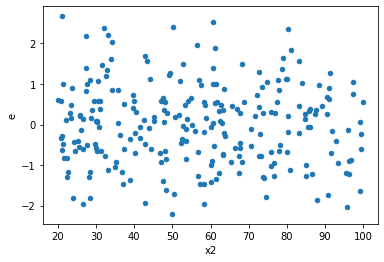

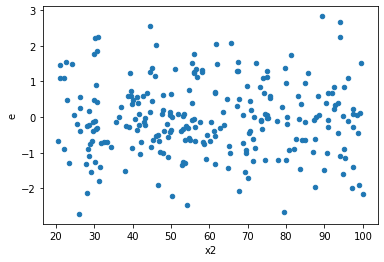

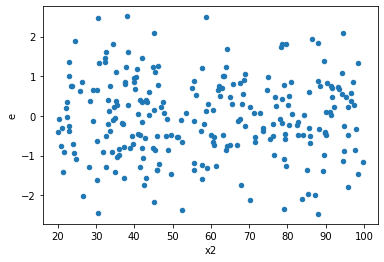

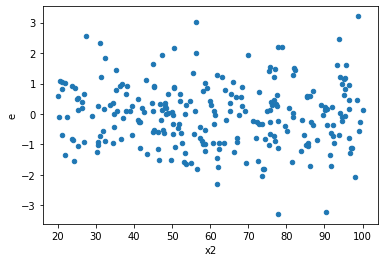

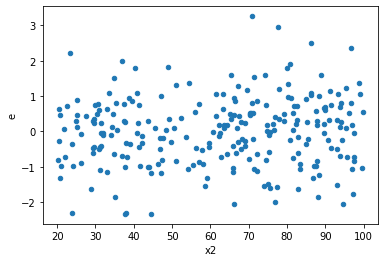

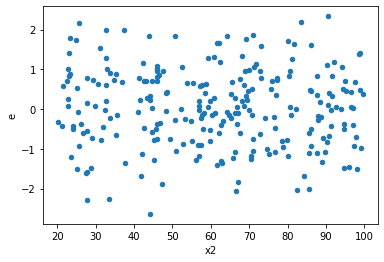

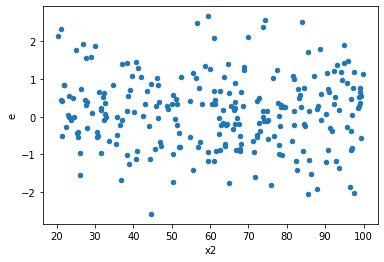

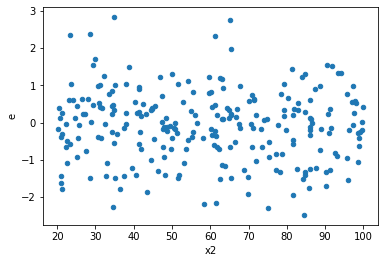

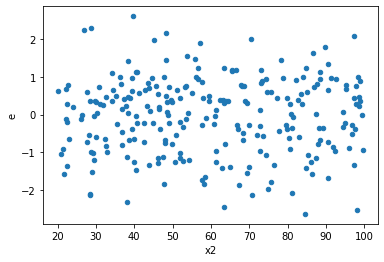

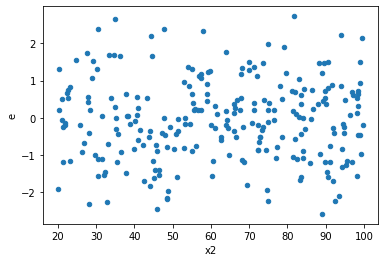

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,27907.058811536743,34028.63037995616,287.70163723233753,350.8106224737748,1.2193556694655607,0.3303956392647831,0.8348021803676084,0.16519781963239155,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,30164.31287285573,32404.904043856674,310.9722976583065,334.0711757098626,1.0742795362336002,0.7249201695774385,0.6375399152112807,0.3624600847887193,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,31486.5359638713,34712.853658965505,324.603463545065,357.86447071098456,1.1024665812332033,0.6319052261479285,0.6840473869260357,0.3159526130739643,Reject001=1 : Homoscedasticity
9.0,97.0,97.0,29177.710246284798,31317.93656322077,300.8011365596371,322.86532539402856,1.0733514144485854,0.7281054598036785,0.6359472700981608,0.36405272990183923,Reject001=1 : Homoscedasticity
10.0,97.0,97.0,32566.18572086918,35435.747805072344,335.7338734110225,365.3169876811582,1.088114773673488,0.6783471676485537,0.6608264161757231,0.33917358382427687,Reject001=1 : Homoscedasticity
11.0,97.0,97.0,32004.833671251246,32137.3932174624,329.9467388788788,331.31333213878764,1.0041418601818959,0.9838026398290136,0.5080986800854932,0.4919013199145068,Reject001=1 : Homoscedasticity
13.0,97.0,97.0,28520.97216158767,29553.372115229,294.03064084110997,304.67393933225776,1.0361979229807525,0.8613559253802636,0.5693220373098682,0.4306779626901318,Reject001=1 : Homoscedasticity
14.0,97.0,97.0,30677.05805839658,33190.789594043075,316.2583304989338,342.1730885983822,1.0819417406604435,0.6989140615434177,0.6505429692282911,0.34945703077170887,Reject001=1 : Homoscedasticity
15.0,97.0,97.0,30188.99039588311,33999.64522562295,311.226705112197,350.5118064497212,1.1262266402343653,0.5594204538794272,0.7202897730602864,0.2797102269397136,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,27907.058811536743,34028.63037995616,287.70163723233753,350.8106224737748,1.2193556694655607,0.3303956392647831,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,37901.99265791991,22276.207863830765,390.7421923496898,229.65162746217283,0.5877318394545143,0.00944707922188913,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,30164.31287285573,32404.904043856674,310.9722976583065,334.0711757098626,1.0742795362336002,0.7249201695774385,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,42070.37547919077,31784.044597360542,433.715211125678,327.670562859387,0.7554970507235396,0.1691578526283508,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,29975.528288002122,27735.66612842583,309.02606482476415,285.9347023549055,0.9252769746689399,0.702899355582488,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,31486.5359638713,34712.853658965505,324.603463545065,357.86447071098456,1.1024665812332033,0.6319052261479285,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,31864.95675118331,27996.382901674275,328.50470877508565,288.6225041409719,0.878594724614984,0.525092717488637,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,30807.715484922413,27151.26295071722,317.60531427755063,279.90992732698163,0.8813137398651095,0.5350253022756365,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,32930.30621583874,29060.590258038883,339.4876929467911,299.59371400040084,0.8824877019838154,0.539333488760629,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      992
Reject001=0 : Heteroscedasticity      8
Name: Result_test, dtype: int64